# Early Stage Diabetes prediction

## Features of the dataset

1. Age: This feature represents the age of the patient in years, ranging from    20 to 65 years.


2. Gender: This feature indicates the gender of the patient and can take on      two values: Male or Female. 


3. Polyuria: This feature indicates whether the patient experiences excessive    urination.


4. Polydipsia: This feature indicates whether the patient experiences            excessive thirst.


5. Sudden weight loss: This feature indicates whether the patient has            experienced sudden weight loss.


6. Weakness: This feature indicates whether the patient experiences 
   weakness.


7. Polyphagia: This feature indicates whether the patient experiences            excessive hunger or increased appetite.


8. Genital Thrush: This feature indicates whether the patient experiences        genital thrush.(a fungus called candida)


8. Visual blurring: This feature indicates whether the patient experiences      visual blurring or difficulty in seeing. 


9. Itching: This feature indicates whether the patient experiences 
   itching.


10. Irritability: This feature indicates whether the patient experiences         irritability.

11. Delayed healing: This feature indicates whether the patient experiences       delayed wound healing.


12. Partial Paresis: This feature indicates whether the patient experiences       partial paralysis or weakness of muscles.


13. Muscle stiffness: This feature indicates whether the patient experiences     muscle stiffness.


14. Alopecia: This feature indicates whether the patient experiences alopecia     or hair loss.


15. Obesity: This feature indicates whether the patient is obese.


These features provide information about various signs and symptoms that associated with diabetes.

In [120]:
## import common modules for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings('ignore')

### Importing Dataset

In [121]:
df = pd.read_csv("C:/Users/LENOVO/Downloads/01.projects/diabetes_dataset.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### Checking Missing Values

In [76]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 1560 non-null   int64 
 1   Gender              1560 non-null   object
 2   Polyuria            1560 non-null   object
 3   Polydipsia          1560 non-null   object
 4   sudden weight loss  1560 non-null   object
 5   weakness            1560 non-null   object
 6   Polyphagia          1560 non-null   object
 7   Genital thrush      1560 non-null   object
 8   visual blurring     1560 non-null   object
 9   Itching             1560 non-null   object
 10  Irritability        1560 non-null   object
 11  delayed healing     1560 non-null   object
 12  partial paresis     1560 non-null   object
 13  muscle stiffness    1560 non-null   object
 14  Alopecia            1560 non-null   object
 15  Obesity             1560 non-null   object
 16  class               1560

In [78]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [79]:
df.describe()

,Age
count,1560.000000
mean,48.028846
std,12.143669
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


### Distribution of Different Features

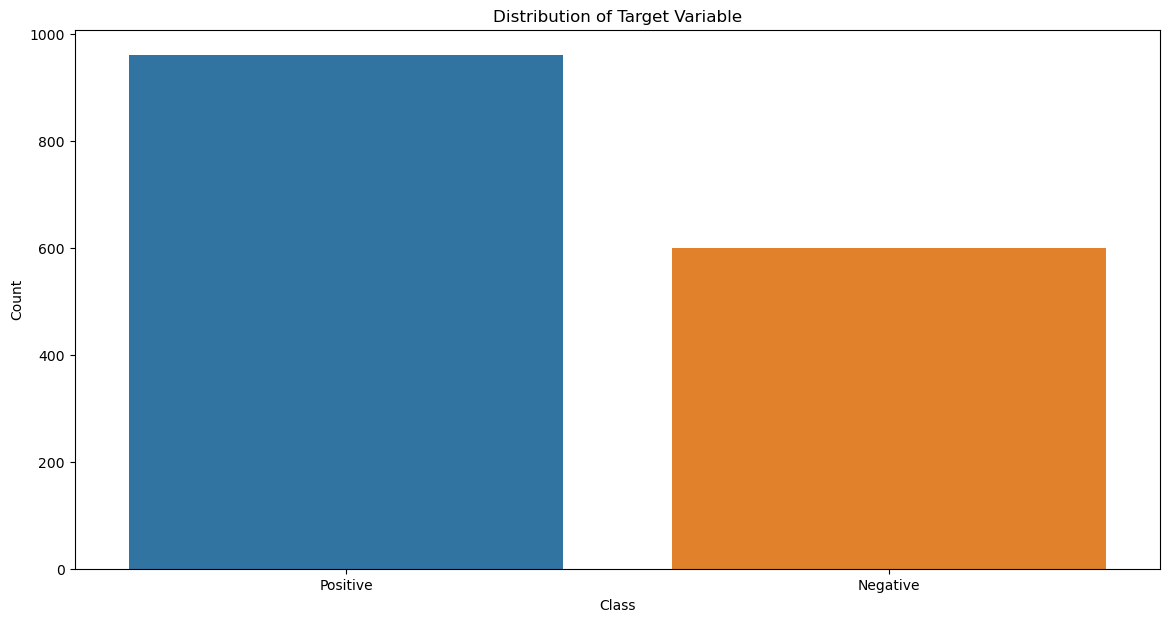

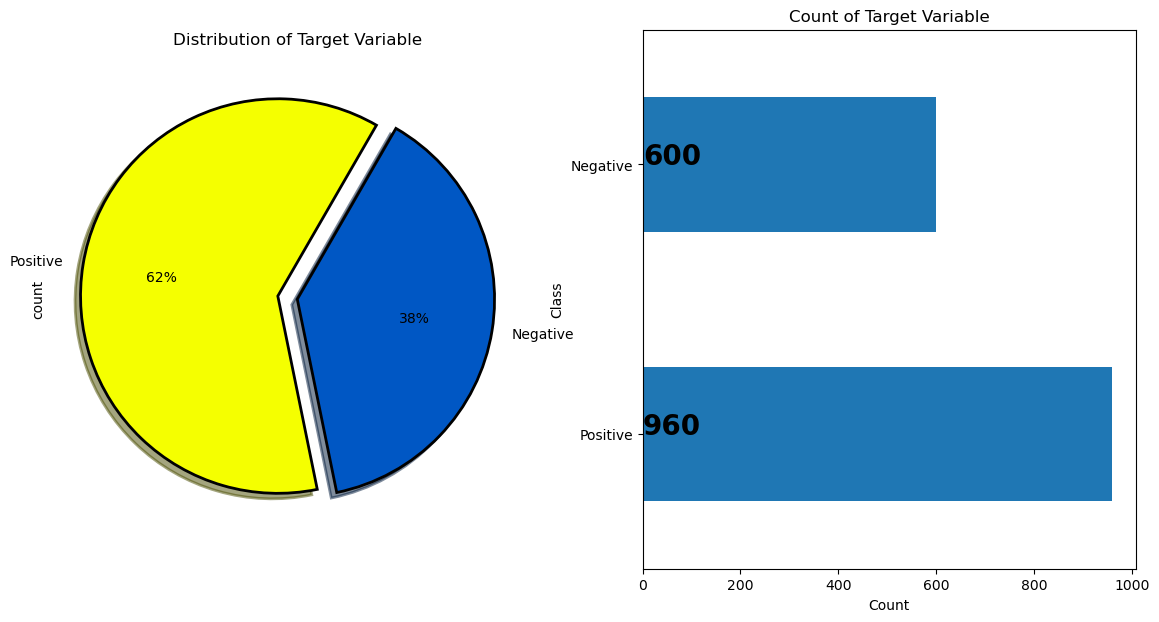

In [80]:
# Distribution of Target Variable using seaborn countplot
plt.figure(figsize=(14, 7))
sns.countplot(x='class', data=df)
plt.title("Distribution of Target Variable")
plt.xlabel("Class")
plt.ylabel("Count")

# plotting to create pie chart and bar plot as subplots
plt.figure(figsize=(14,7))
plt.subplot(121)
df["class"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("prism", 7), startangle=60, labels=["Positive", "Negative"],
                                     wedgeprops={"linewidth": 2, "edgecolor": "k"}, explode=[.1, 0], shadow=True)
plt.title("Distribution of Target Variable")

plt.subplot(122)
ax = df["class"].value_counts().plot(kind="barh")

for i, j in enumerate(df["class"].value_counts().values):
    ax.text(.7, i, j, weight="bold", fontsize=20)

plt.title("Count of Target Variable")
plt.xlabel("Count")
plt.ylabel("Class")
plt.show()


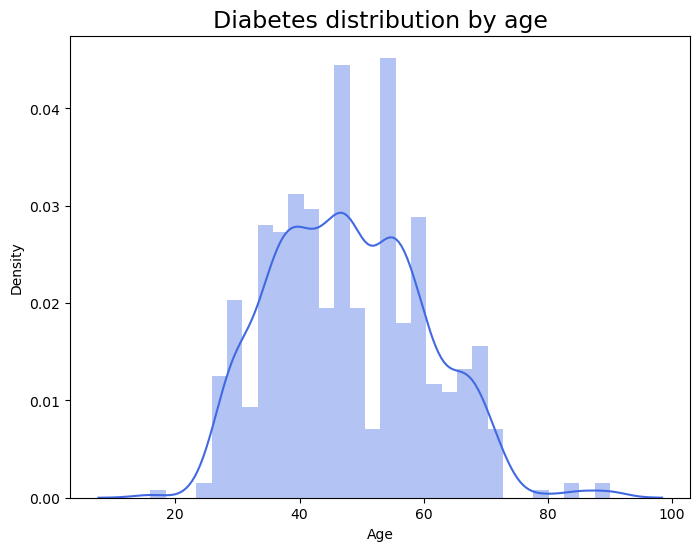

In [81]:
plt.figure(figsize=(8,6))
sns.distplot(df['Age'],bins=30, color='royalblue')
plt.title('Diabetes distribution by age', fontsize=17);

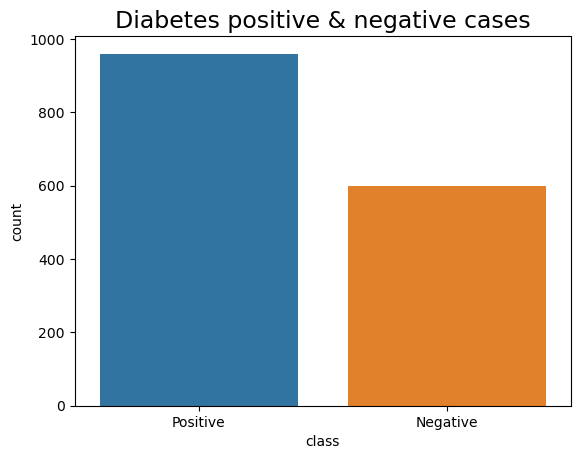

<Figure size 1500x800 with 0 Axes>

In [82]:
sns.countplot(x='class',data = df)
plt.title('Diabetes positive & negative cases', fontsize=17);
plt.figure(figsize=(15,8))
plt.show()

class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


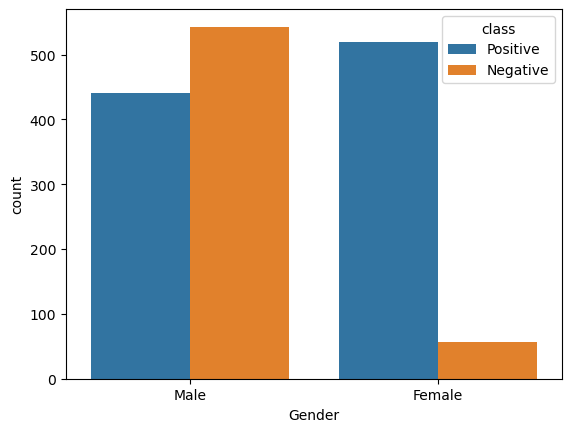

In [83]:
# Distribution of Gender
sns.countplot(x='Gender',hue='class', data=df)

plot_criteria= ['Gender', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polyuria,,
No,92.500000,24.060000
Yes,7.500000,75.940000


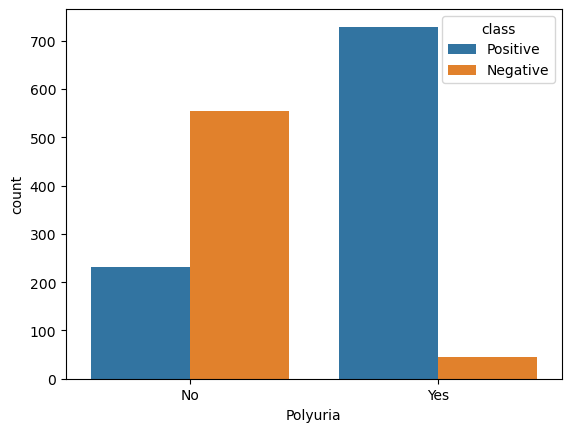

In [84]:
# Distribution of Polyuria
sns.countplot(x='Polyuria',hue='class', data=df)


plot_criteria= ['Polyuria', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polydipsia,,
No,96.000000,29.690000
Yes,4.000000,70.310000


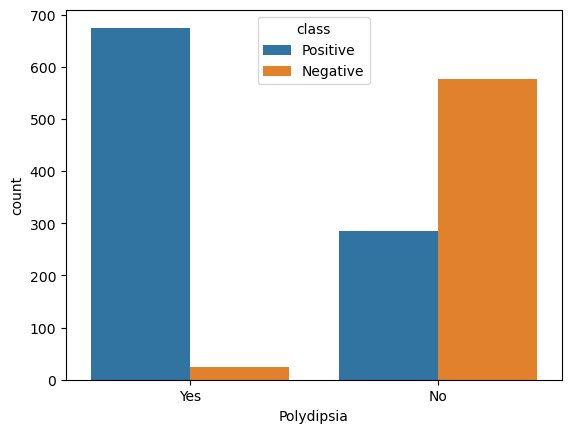

In [85]:
# Distribution of Polydipsia
sns.countplot(x='Polydipsia',hue='class', data=df)


plot_criteria= ['Polydipsia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
sudden weight loss,,
No,85.500000,41.250000
Yes,14.500000,58.750000


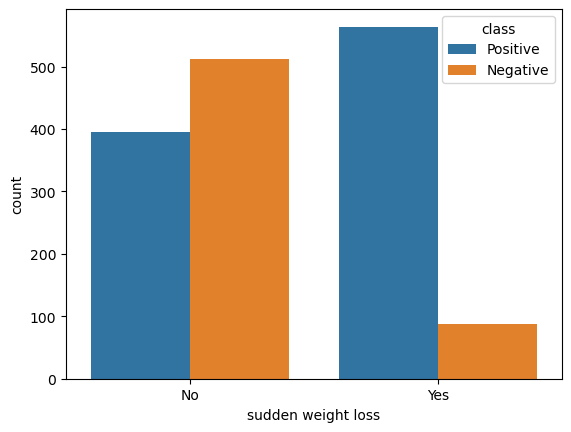

In [86]:
# Distribution of sudden weight loss
sns.countplot(x='sudden weight loss',hue='class', data=df)


plot_criteria= ['sudden weight loss', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
weakness,,
No,56.500000,31.870000
Yes,43.500000,68.120000


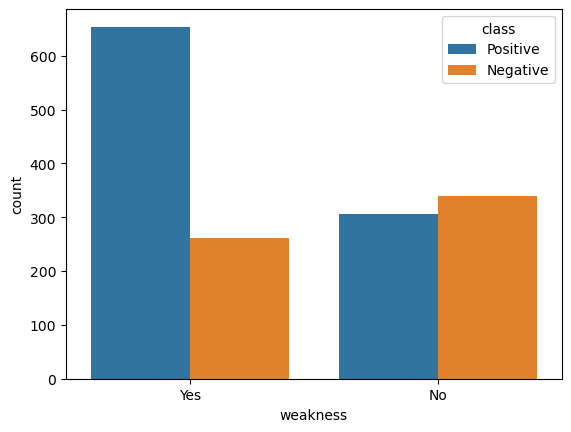

In [87]:
# Distribution of weakness
sns.countplot(x='weakness',hue='class', data=df)


plot_criteria= ['weakness', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polyphagia,,
No,76.000000,40.940000
Yes,24.000000,59.060000


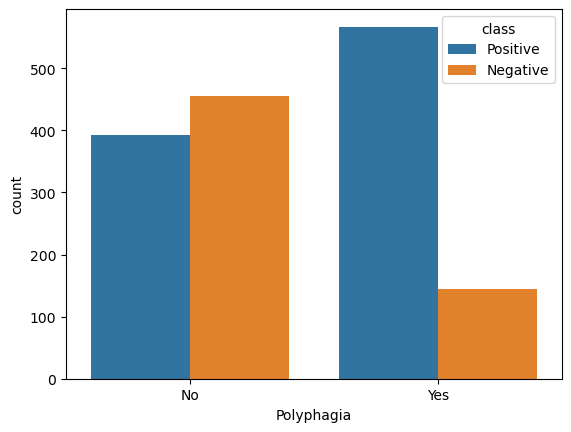

In [88]:
# Distribution of Polyphagia
sns.countplot(x='Polyphagia',hue='class', data=df)


plot_criteria= ['Polyphagia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Genital thrush,,
No,83.500000,74.060000
Yes,16.500000,25.940000


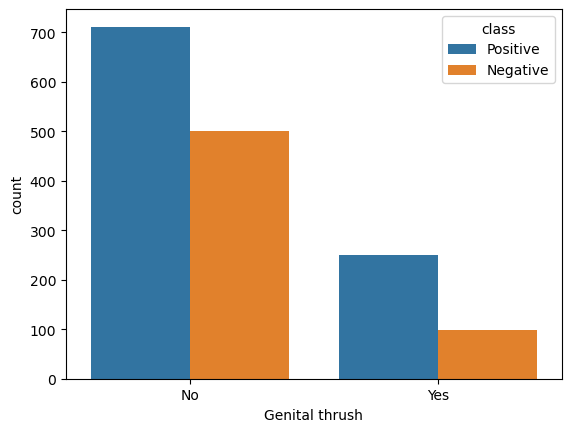

In [89]:
# Distribution of Genital thrush
sns.countplot(x='Genital thrush',hue='class', data=df)


plot_criteria= ['Genital thrush', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
visual blurring,,
No,71.000000,45.310000
Yes,29.000000,54.690000


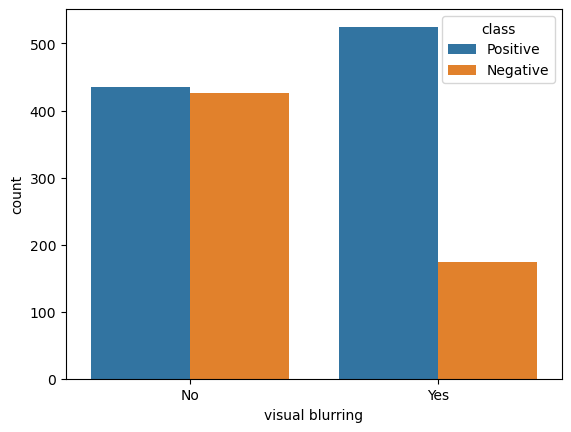

In [90]:
# Distribution of visual blurring
sns.countplot(x='visual blurring',hue='class', data=df)


plot_criteria= ['visual blurring', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Itching,,
No,50.500000,51.880000
Yes,49.500000,48.120000


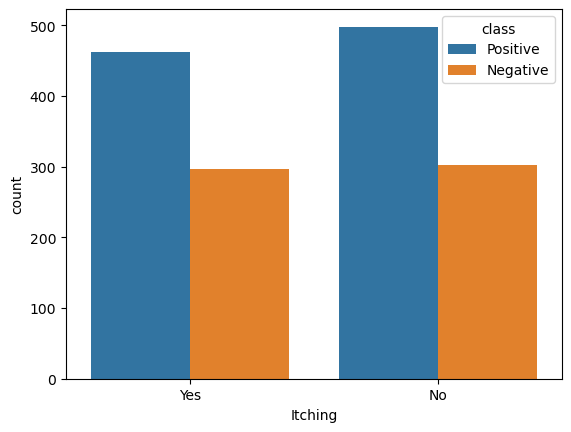

In [91]:
# Distribution of Itching
sns.countplot(x='Itching',hue='class', data=df)


plot_criteria= ['Itching', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Irritability,,
No,92.000000,65.620000
Yes,8.000000,34.380000


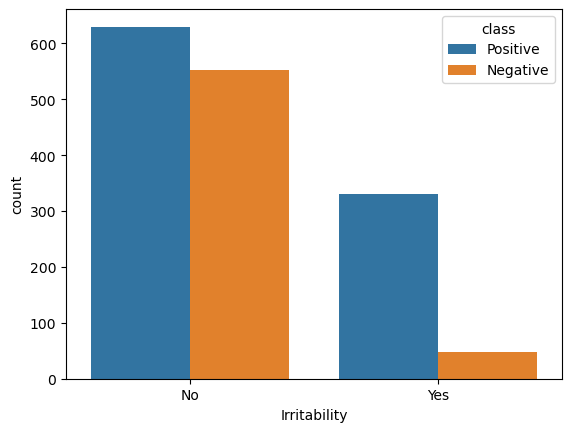

In [92]:
# Distribution of Irritability
sns.countplot(x='Irritability',hue='class', data=df)


plot_criteria= ['Irritability', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
delayed healing,,
No,57.000000,52.190000
Yes,43.000000,47.810000


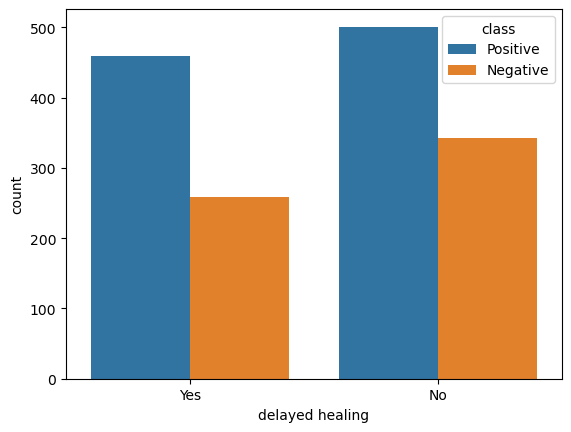

In [93]:
# Distribution of delayed healing
sns.countplot(x='delayed healing',hue='class', data=df)


plot_criteria= ['delayed healing', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
partial paresis,,
No,84.000000,40.000000
Yes,16.000000,60.000000


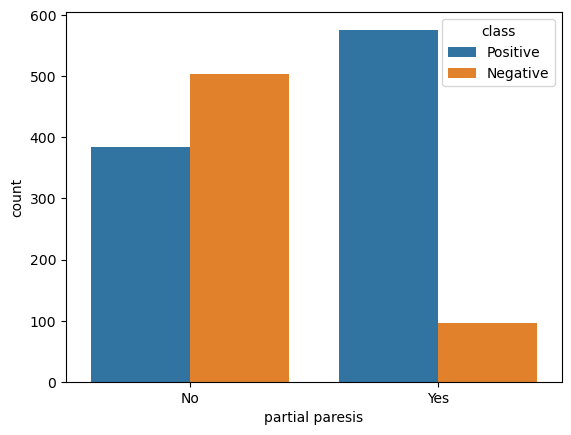

In [94]:
# Distribution of partial paresis
sns.countplot(x='partial paresis',hue='class', data=df)


plot_criteria= ['partial paresis', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
muscle stiffness,,
No,70.000000,57.810000
Yes,30.000000,42.190000


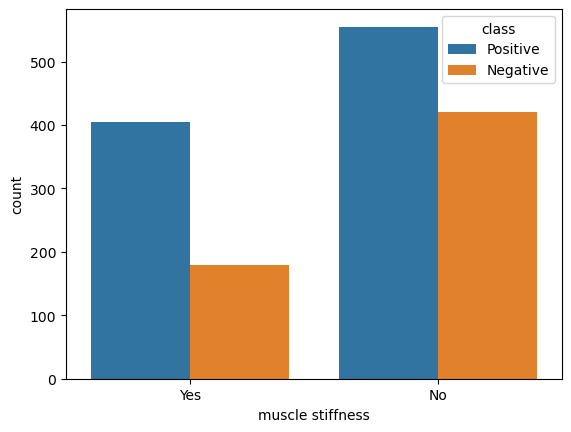

In [95]:
# Distribution of muscle stiffness
sns.countplot(x='muscle stiffness',hue='class', data=df)


plot_criteria= ['muscle stiffness', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Alopecia,,
No,49.500000,75.620000
Yes,50.500000,24.380000


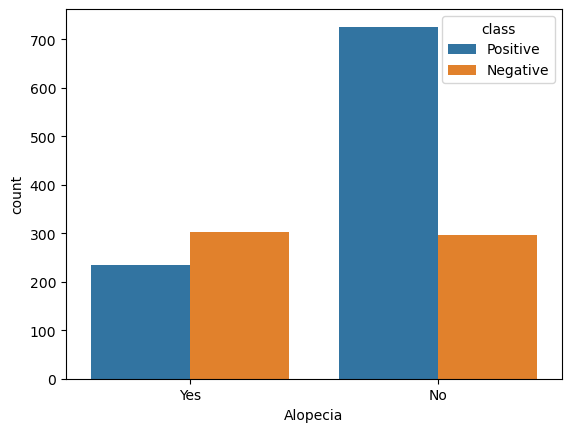

In [96]:
# Distribution of Alopecia
sns.countplot(x='Alopecia',hue='class', data=df)


plot_criteria= ['Alopecia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Obesity,,
No,86.500000,80.940000
Yes,13.500000,19.060000


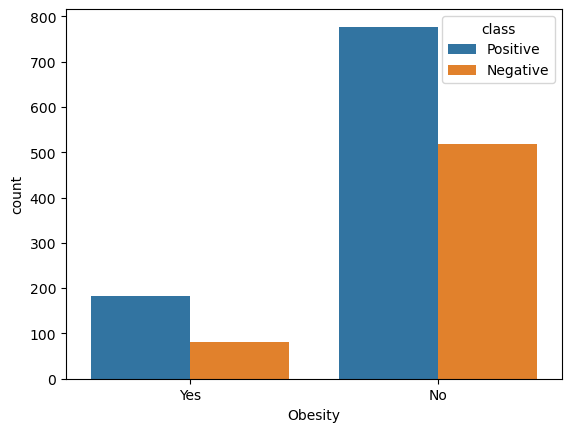

In [97]:
# Distribution of Obesity
sns.countplot(x='Obesity',hue='class', data=df)


plot_criteria= ['Obesity', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

### Occurences of Symptoms in Patients

In [98]:
# Function for Pie Plot
def plotPie(value, title, label):
    plt.figure(figsize=(4,4))
    plt.pie(
        value.value_counts(),
        startangle=90,
        labels = label,
        autopct=(lambda p:f'{p:.2f}%\n{p*sum(value.value_counts())/100 :.0f} items')
    )
    plt.title(title)
    plt.show()

<Figure size 500x500 with 0 Axes>

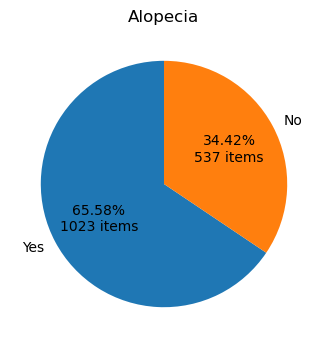

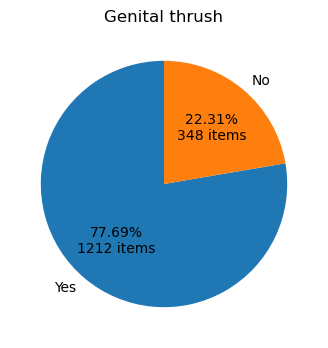

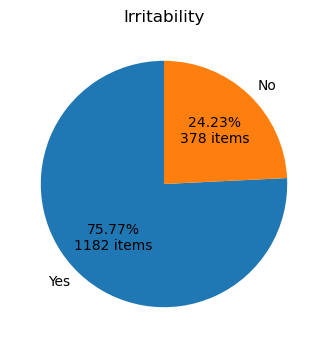

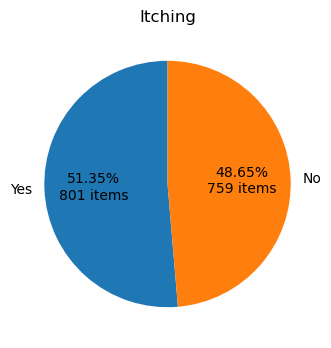

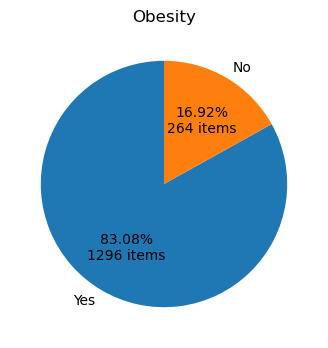

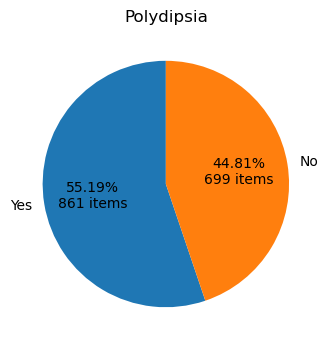

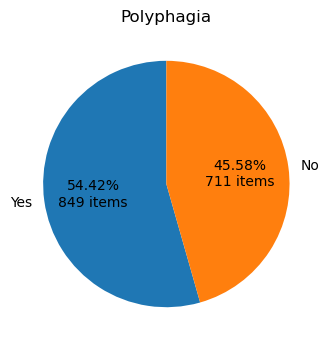

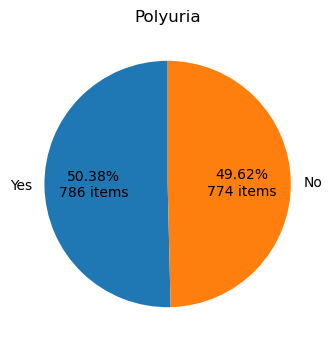

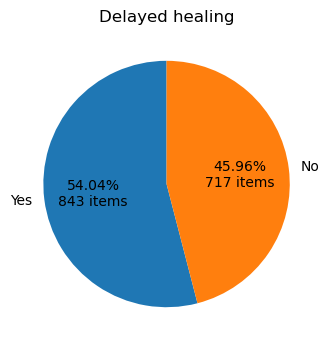

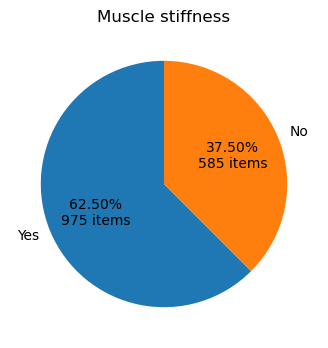

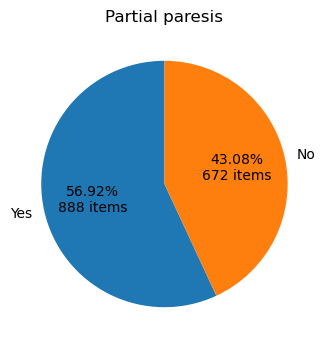

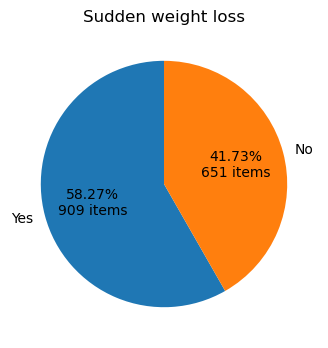

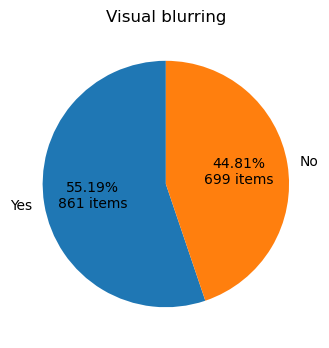

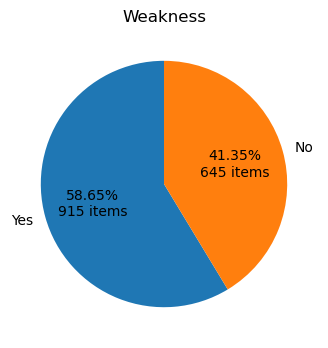

In [99]:
df_symptoms = df[df.columns.difference(["Age", "class", "Gender"])]
plt.figure(figsize=(5,5))

for column in df_symptoms.columns:
    plotPie(df_symptoms[column], column.capitalize(), ["Yes", "No"])
 

 ### Data Pre-Processing
 

In [100]:
# Changing Postive to 1 and Negative to 0
df['class'] = df['class'].apply(lambda x: 0 if x=='Negative' else 1)
df['class'].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [101]:
# Separating Target feature
X = df.drop(['class'], axis=1)
y = df['class']

In [102]:
# Storing Features
objectList = X.select_dtypes(include = "object").columns
print(objectList)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


In [103]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in objectList:
    X[feature] = le.fit_transform(X[feature].astype(str))

print (X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 1560 non-null   int64
 1   Gender              1560 non-null   int32
 2   Polyuria            1560 non-null   int32
 3   Polydipsia          1560 non-null   int32
 4   sudden weight loss  1560 non-null   int32
 5   weakness            1560 non-null   int32
 6   Polyphagia          1560 non-null   int32
 7   Genital thrush      1560 non-null   int32
 8   visual blurring     1560 non-null   int32
 9   Itching             1560 non-null   int32
 10  Irritability        1560 non-null   int32
 11  delayed healing     1560 non-null   int32
 12  partial paresis     1560 non-null   int32
 13  muscle stiffness    1560 non-null   int32
 14  Alopecia            1560 non-null   int32
 15  Obesity             1560 non-null   int32
dtypes: int32(15), int64(1)
memory usage: 103.7

In [104]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


### Correlation Between Features

In [105]:
X.corrwith(y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

<Axes: title={'center': 'Correlation with Diabetes'}>

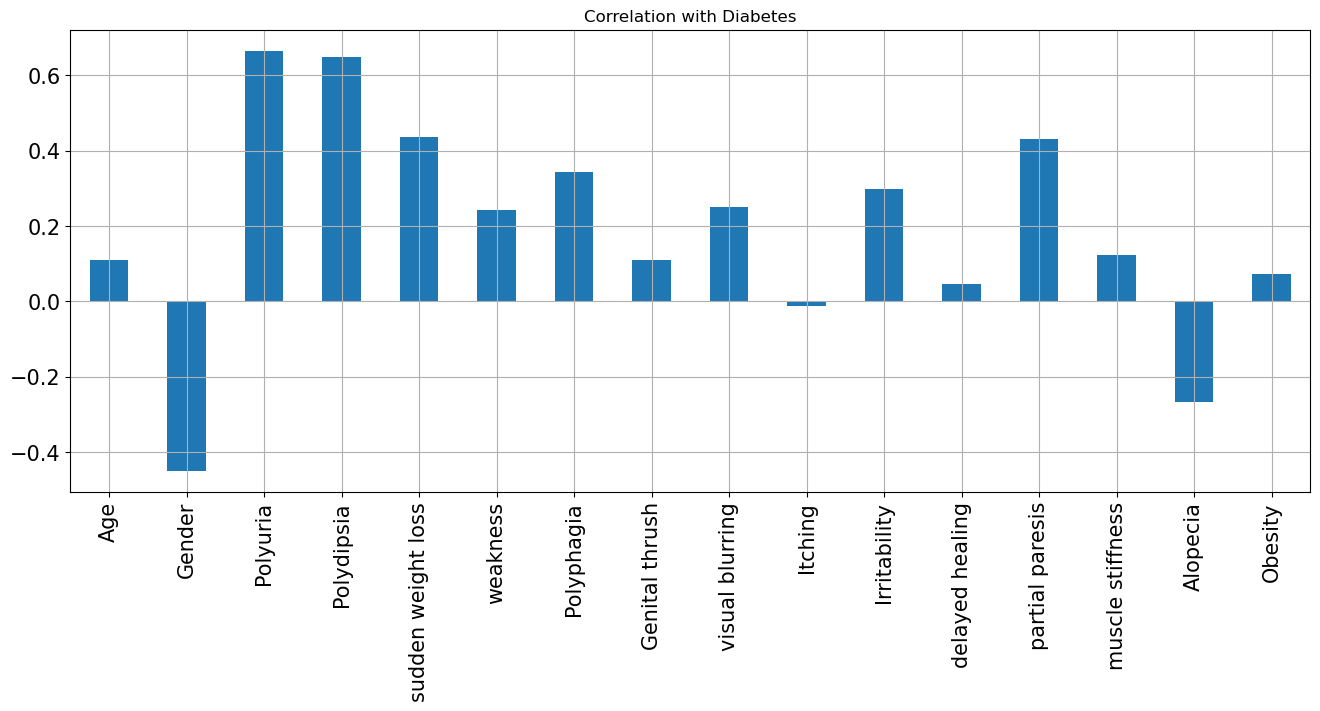

In [106]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 6), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)

### Data Normalization

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [108]:
## checking distribution of target variable in train test split
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())

Distribution of target variable in training set
class
1    769
0    479
Name: count, dtype: int64
Distribution of target variable in test set
class
1    191
0    121
Name: count, dtype: int64


In [109]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

In [110]:
X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
1007,0.364865,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
702,0.256757,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0
87,0.162162,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
851,0.581081,0,0,0,0,1,0,0,1,1,0,1,0,1,1,1
1252,0.364865,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


 ### Feature Selection

In [111]:
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [112]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 1)

In [114]:
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

### Model Building

To predict the diabetes risk through this machine Learning Algorithms
Support Vector Machines

**Logistic regression**

**Decision Tree**

**Support Vector Machines**

**Random Forest**


In [115]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Logistic regression 

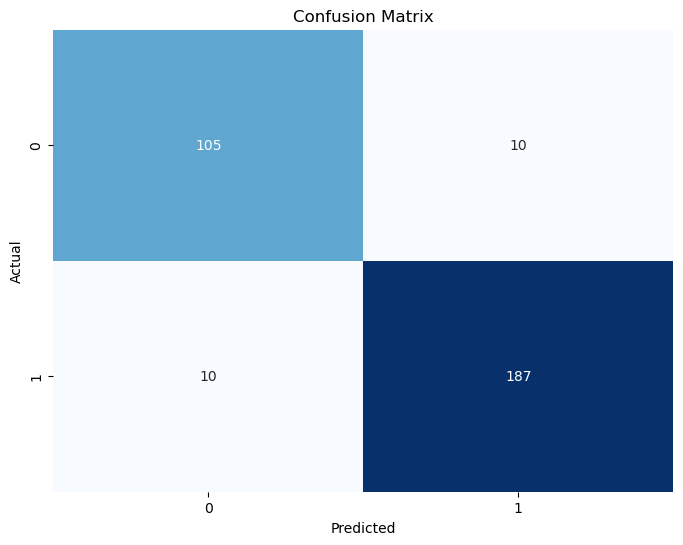

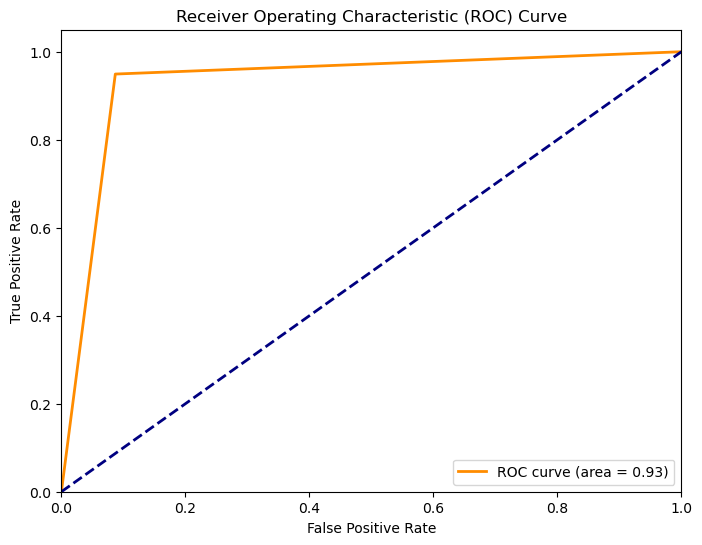

Accuracy: 0.9358974358974359
Precision: 0.949238578680203
Recall: 0.949238578680203
F1 Score: 0.949238578680203
ROC AUC Score: 0.9311410284705364


In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Preprocessing (Assuming your data is already preprocessed)

# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Instantiate Model
logistic_reg_model = LogisticRegression(random_state=42)

# Step 4: Train Model
logistic_reg_model.fit(X_train, y_train)

# Step 5: Evaluate Model
y_pred = logistic_reg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


## Decision Tree

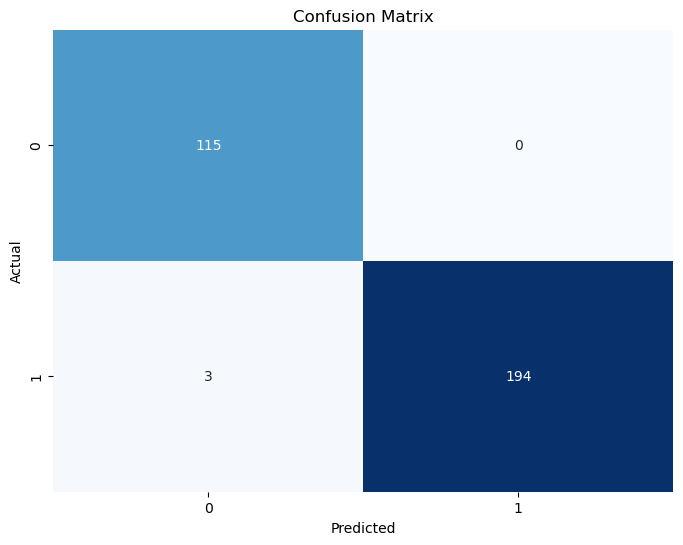

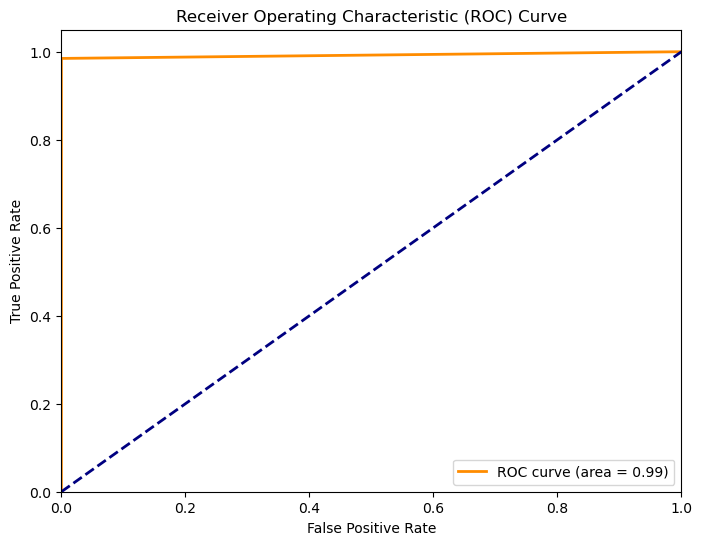

Accuracy: 0.9903846153846154
Precision: 1.0
Recall: 0.9847715736040609
F1 Score: 0.9923273657289001
ROC AUC Score: 0.9923857868020305


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Preprocessing (Assuming your data is already preprocessed)

# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Instantiate Model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Step 4: Train Model
decision_tree_model.fit(X_train, y_train)

# Step 5: Evaluate Model
y_pred = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


## Support Vector Machine

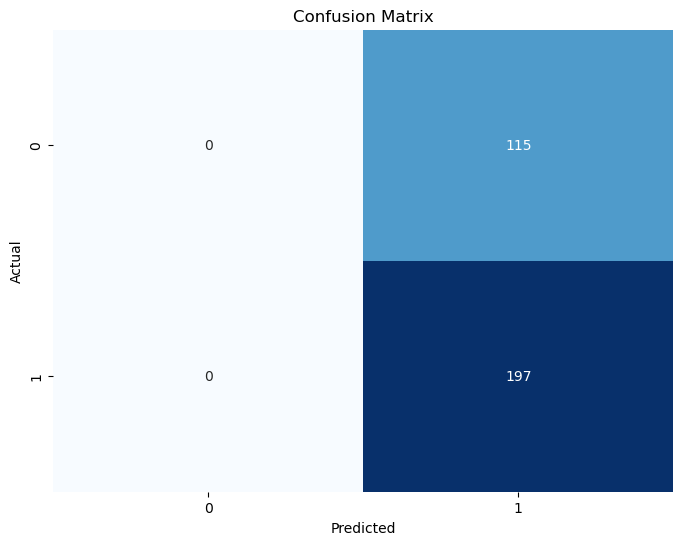

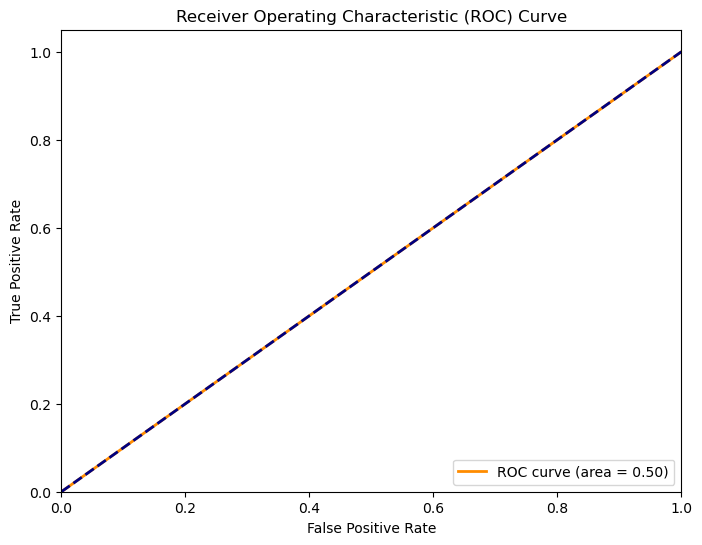

Accuracy: 0.6314102564102564
Precision: 0.6314102564102564
Recall: 1.0
F1 Score: 0.7740667976424361
ROC AUC Score: 0.5


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Preprocessing (Assuming your data is already preprocessed)

# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Instantiate Model
svm_model = SVC(random_state=42)

# Step 4: Train Model
svm_model.fit(X_train, y_train)

# Step 5: Evaluate Model
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


## Random Forest

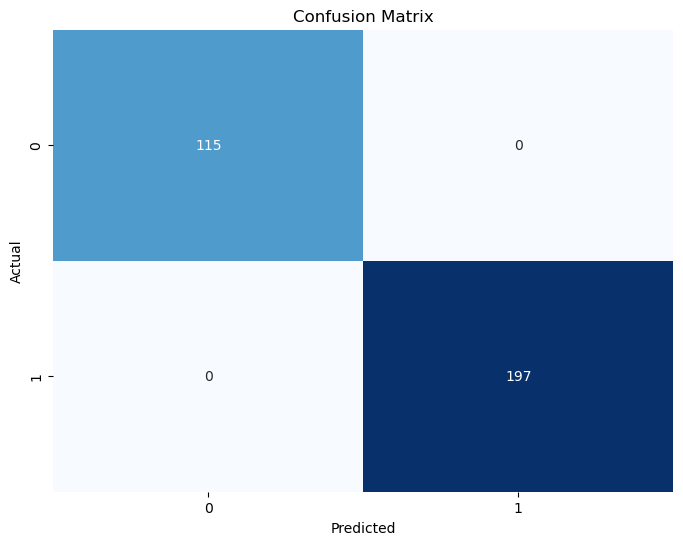

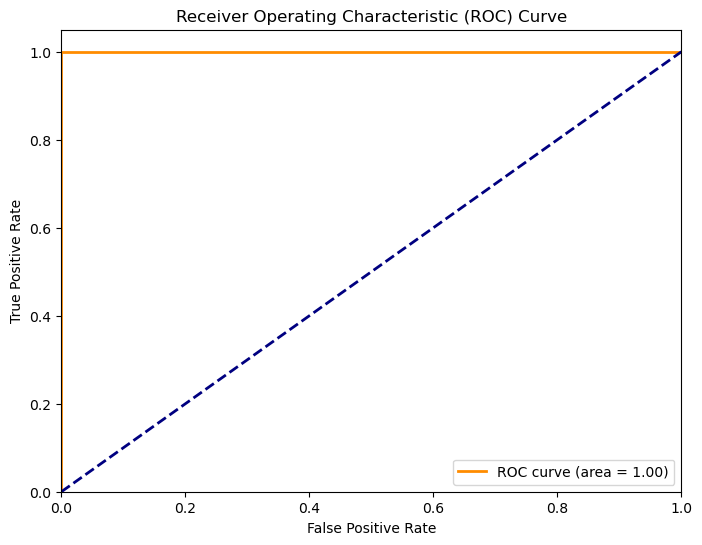

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Preprocessing (Assuming your data is already preprocessed)

# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Instantiate Model
rf_model = RandomForestClassifier(random_state=42)

# Step 4: Train Model
rf_model.fit(X_train, y_train)

# Step 5: Evaluate Model
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


 ## making predictions

In [146]:
#logistic regression
prediction1 = rf_model.predict(X_train[:20])   
print(prediction1)

[0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1]


In [147]:
# decision tree 
prediction2 = decision_tree_model.predict(X_train[:20]) 
print(prediction2)

[0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1]


In [148]:
# Support Vector Machine 
prediction3 = svm_model.predict(X_train[:20]) 
print(prediction3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [149]:
# Random forest
prediction4 = rf_model.predict(X_train[:20]) 
print(prediction4)

[0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1]


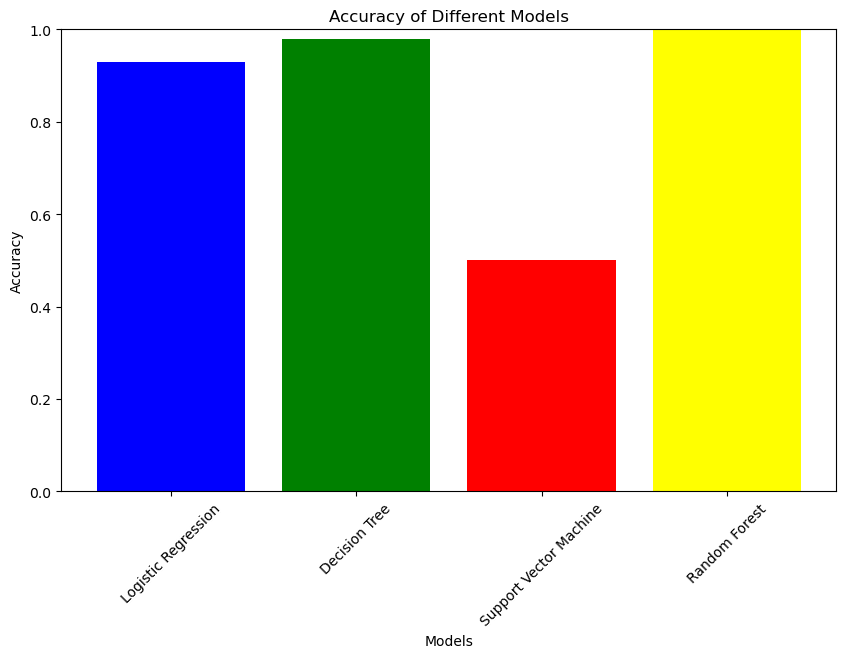

In [159]:
import matplotlib.pyplot as plt

# Assuming you have defined the accuracy rates for each model
accuracy_lr = 0.93  # Example accuracy rate for Logistic Regression
accuracy_dt = 0.98  # Example accuracy rate for Decision Tree
accuracy_svm = 0.50  # Example accuracy rate for Support Vector Machine
accuracy_rf = 1.0  # Example accuracy rate for Random Forest

# Accuracy rates for each model
accuracy_rates = [accuracy_lr, accuracy_dt, accuracy_svm, accuracy_rf]
models = ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Random Forest']

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_rates, color=['blue', 'green', 'red', 'yellow'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Limiting y-axis from 0 to 1 for accuracy percentage
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


 ## Importing Pickle file

In [161]:
import pickle

# Assuming rf_model is your trained Random Forest model

# Save the model to a file
with open('rf_diabetes_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
